# EDA and Data Visualisation
Refer the documentation for insights and Understanding

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from geopy.distance import geodesic
from scipy import stats

In [3]:
data = pd.read_csv('train_preprocessed.csv')

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,week_day,week_day_num,month,pickup_hour,distance,speed_m_s,speed_km_hr
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,0,3,17,1.502172,3.301477,11.885316
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,6,0,1.808660,2.727994,9.820778
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,1,1,11,6.379687,3.003619,10.813029
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,2,4,19,1.483632,3.458351,12.450063
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,5,3,13,1.187038,2.728822,9.823760


In [5]:
data.shape

(1416037, 18)

### Univariate Analysis

In [6]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,week_day_num,month,pickup_hour,distance,speed_m_s,speed_km_hr
count,1.416037e+06,1.416037e+06,1.416037e+06,1.416037e+06,1.416037e+06,1.416037e+06,1.416037e+06,1.416037e+06,1.416037e+06,1.416037e+06,1.416037e+06,1.416037e+06,1.416037e+06
mean,1.533515e+00,1.661967e+00,-7.397650e+01,4.075260e+01,-7.397484e+01,4.075271e+01,7.832287e+02,3.050634e+00,3.514382e+00,1.360606e+01,2.954317e+00,3.871995e+00,1.393918e+01
std,4.988757e-01,1.313231e+00,6.703888e-02,2.748385e-02,6.685325e-02,3.203299e-02,5.602435e+02,1.951707e+00,1.680612e+00,6.405390e+00,2.697023e+00,1.987209e+00,7.153951e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.435970e+01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399206e+01,4.073838e+01,-7.399137e+01,4.073687e+01,3.900000e+02,1.000000e+00,2.000000e+00,9.000000e+00,1.212916e+00,2.510195e+00,9.036702e+00
50%,2.000000e+00,1.000000e+00,-7.398199e+01,4.075470e+01,-7.397992e+01,4.075486e+01,6.450000e+02,3.000000e+00,4.000000e+00,1.400000e+01,2.033864e+00,3.498276e+00,1.259379e+01
75%,2.000000e+00,2.000000e+00,-7.396822e+01,4.076865e+01,-7.396364e+01,4.077001e+01,1.026000e+03,5.000000e+00,5.000000e+00,1.900000e+01,3.631988e+00,4.819798e+00,1.735127e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,4.391176e+01,-6.133553e+01,4.391176e+01,1.590000e+04,6.000000e+00,6.000000e+00,2.300000e+01,1.634267e+01,1.648743e+01,5.935474e+01


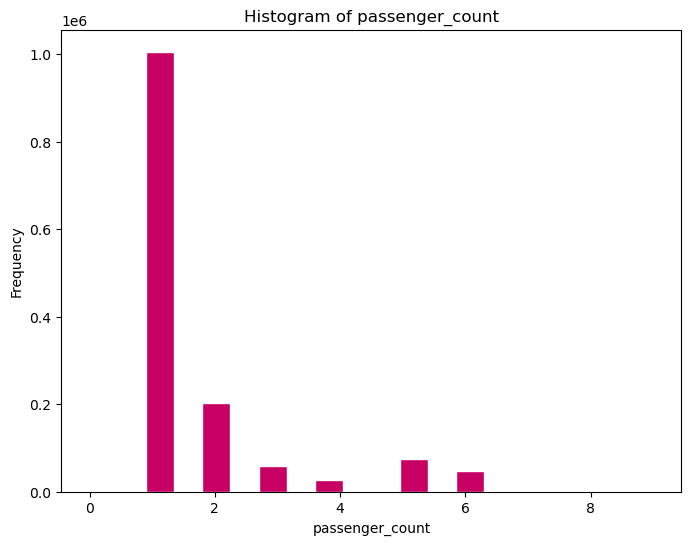

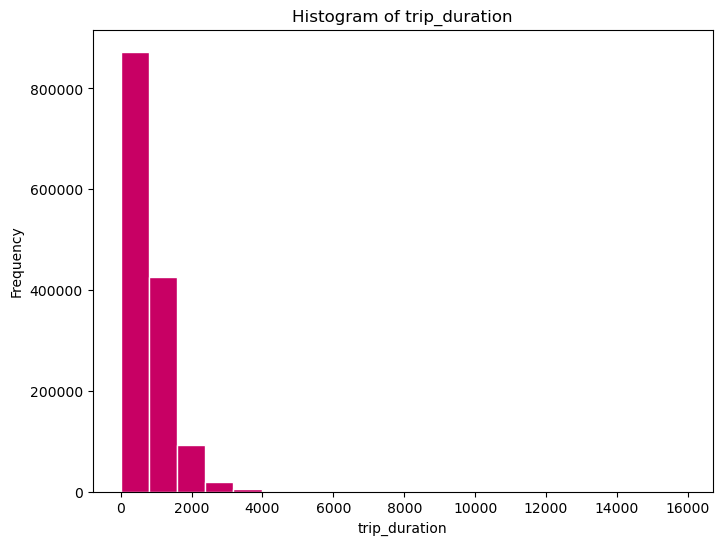

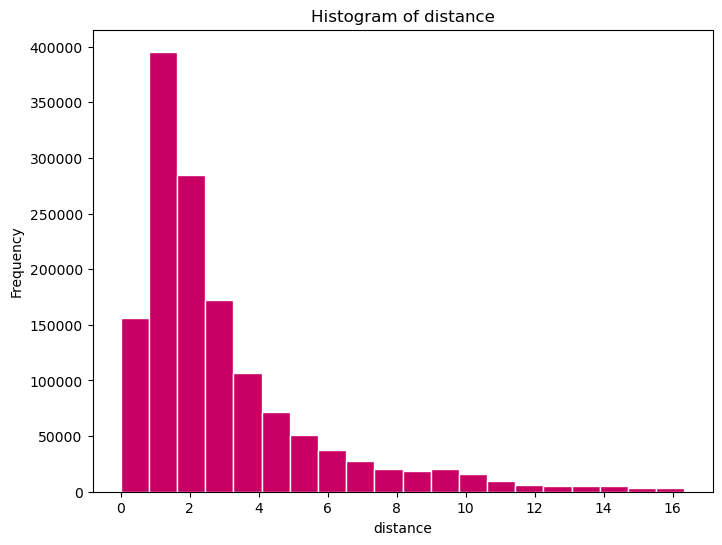

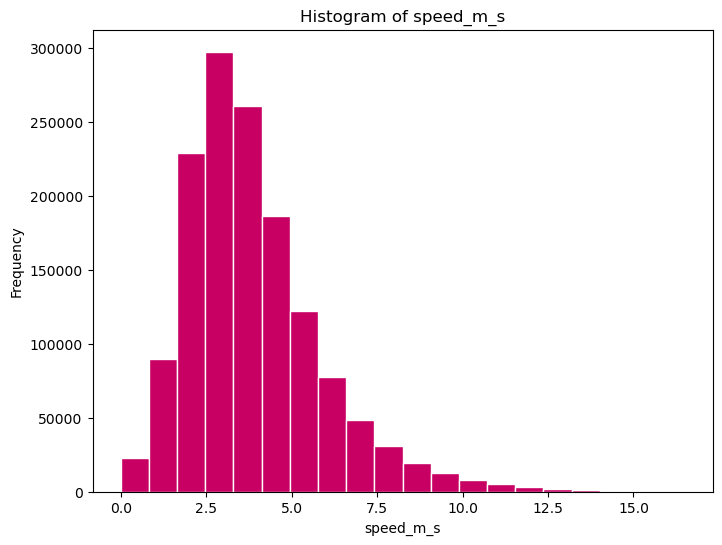

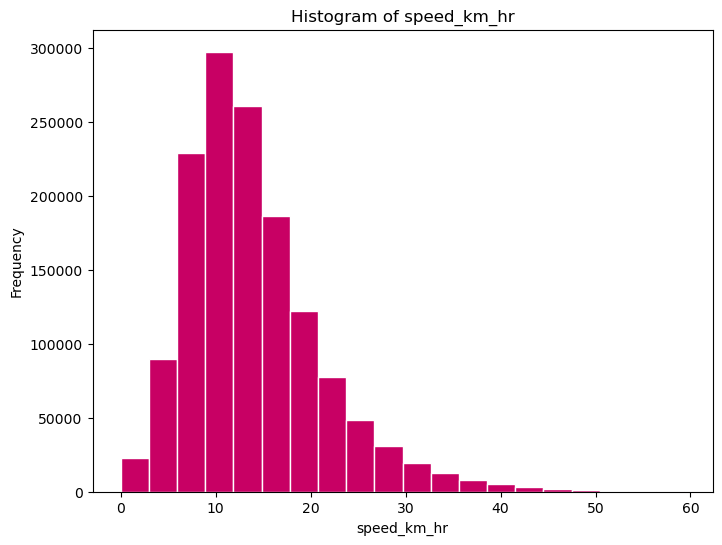

In [22]:
num_attributes = ['passenger_count', 'trip_duration', 'distance', 'speed_m_s', 'speed_km_hr']
for attribute in num_attributes:
    plt.figure(figsize=(8, 6))
    plt.hist(data[attribute], bins=20, edgecolor='white', color=(200/255, 0, 100/255))
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.show()

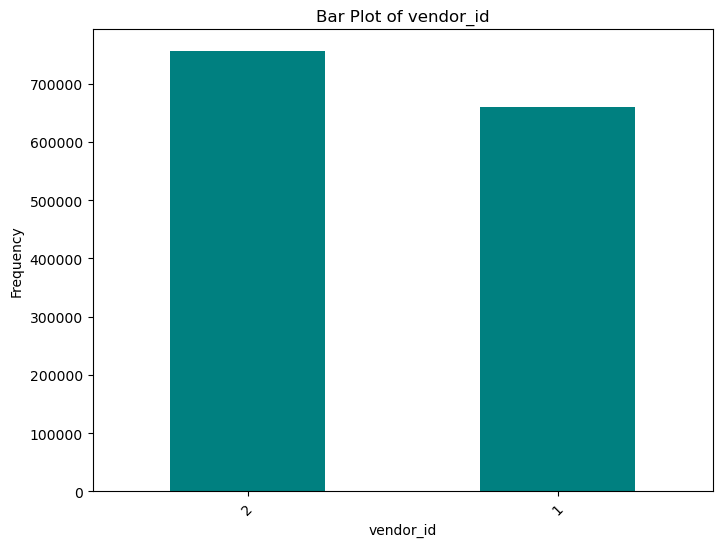

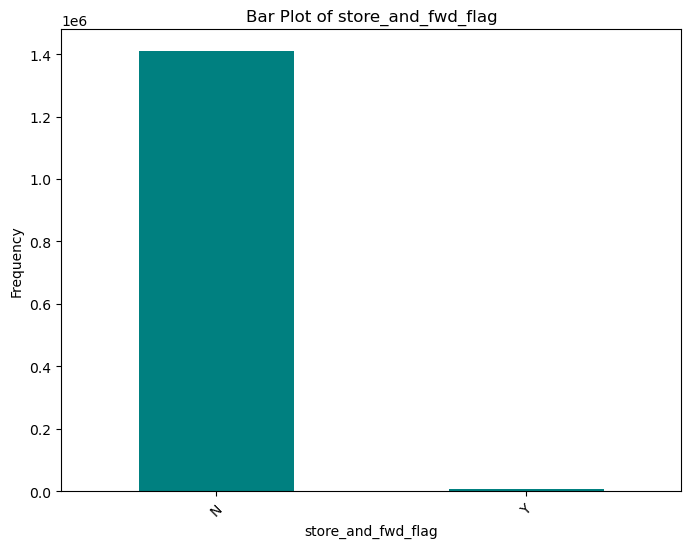

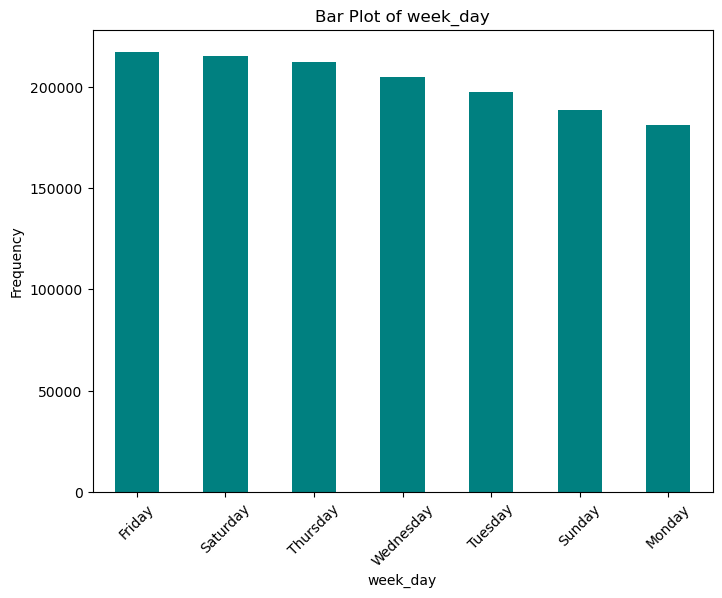

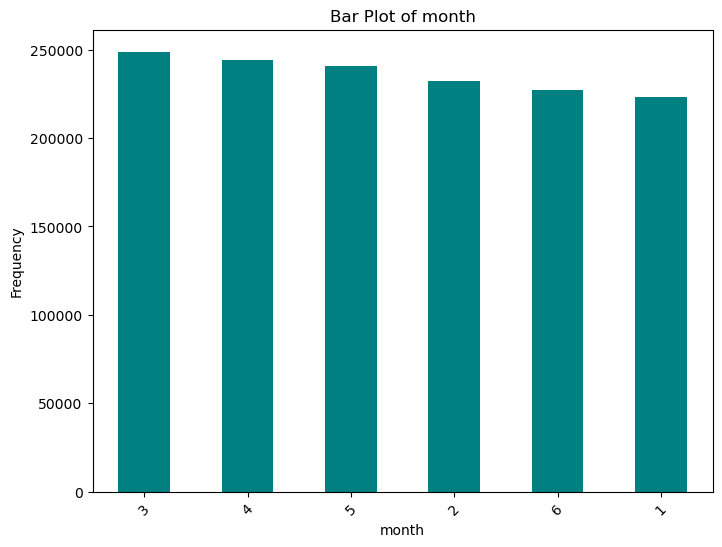

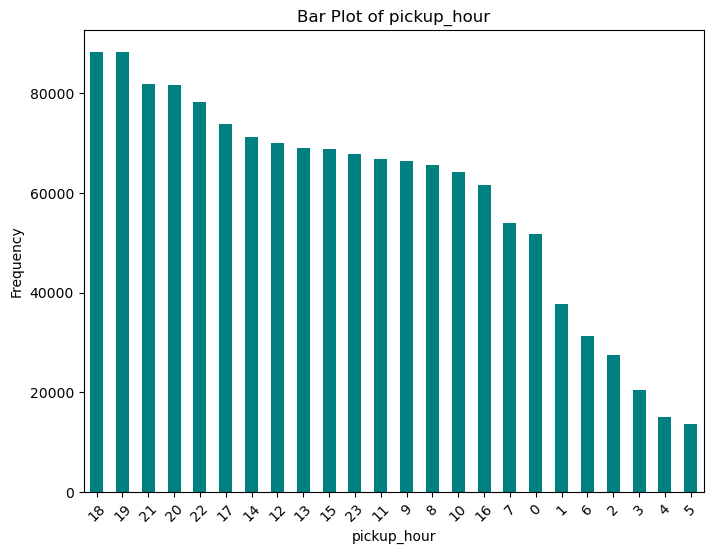

In [8]:
cat_attributes = ['vendor_id', 'store_and_fwd_flag', 'week_day', 'month', 'pickup_hour']
for attribute in cat_attributes:
    plt.figure(figsize=(8, 6))
    data[attribute].value_counts().plot(kind='bar', color="teal")
    plt.title(f'Bar Plot of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis

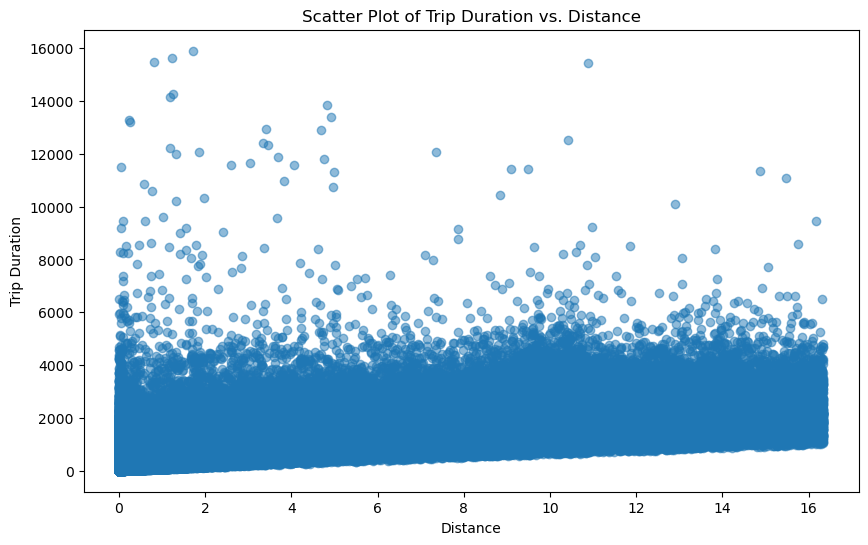

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(data['distance'], data['trip_duration'], alpha=0.5)
plt.title('Scatter Plot of Trip Duration vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Trip Duration')
plt.show()

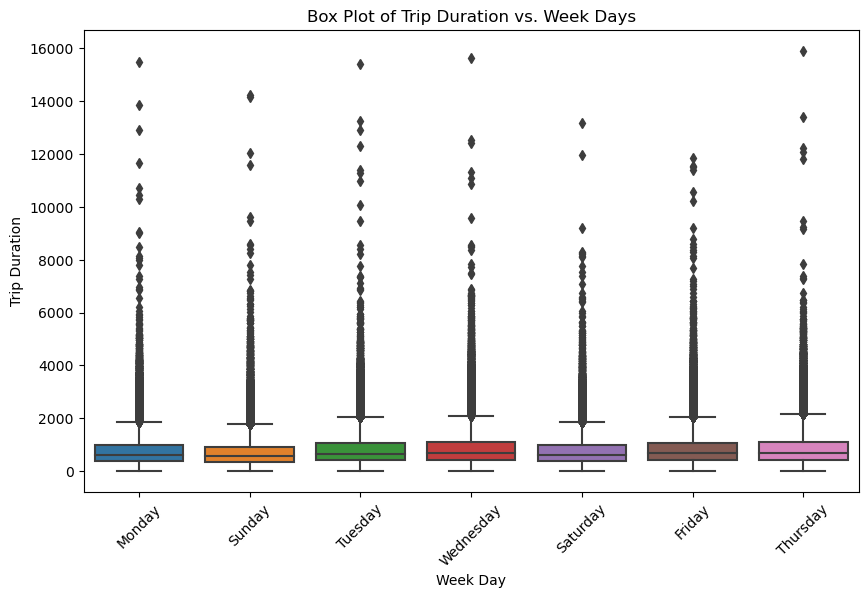

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='week_day', y='trip_duration', data=data)
plt.title('Box Plot of Trip Duration vs. Week Days')
plt.xlabel('Week Day')
plt.ylabel('Trip Duration')
plt.xticks(rotation=45)
plt.show()

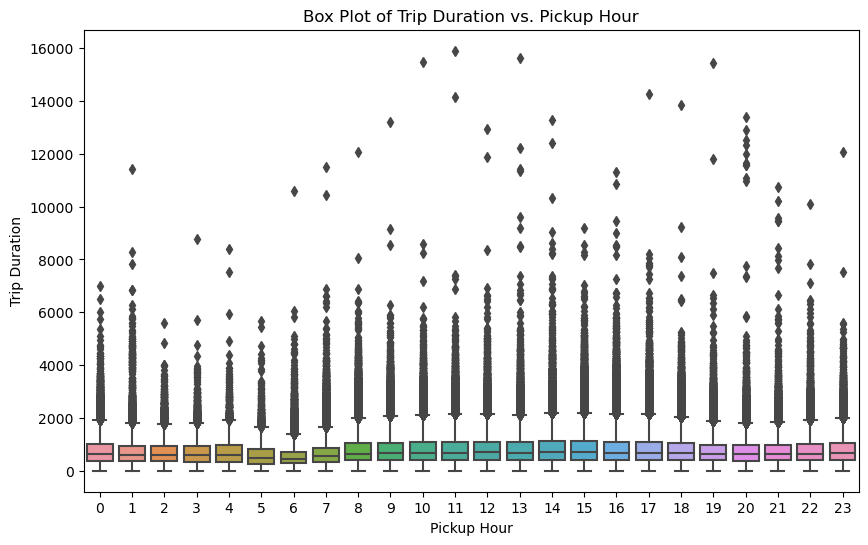

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pickup_hour', y='trip_duration', data=data)
plt.title('Box Plot of Trip Duration vs. Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Trip Duration')
plt.show()

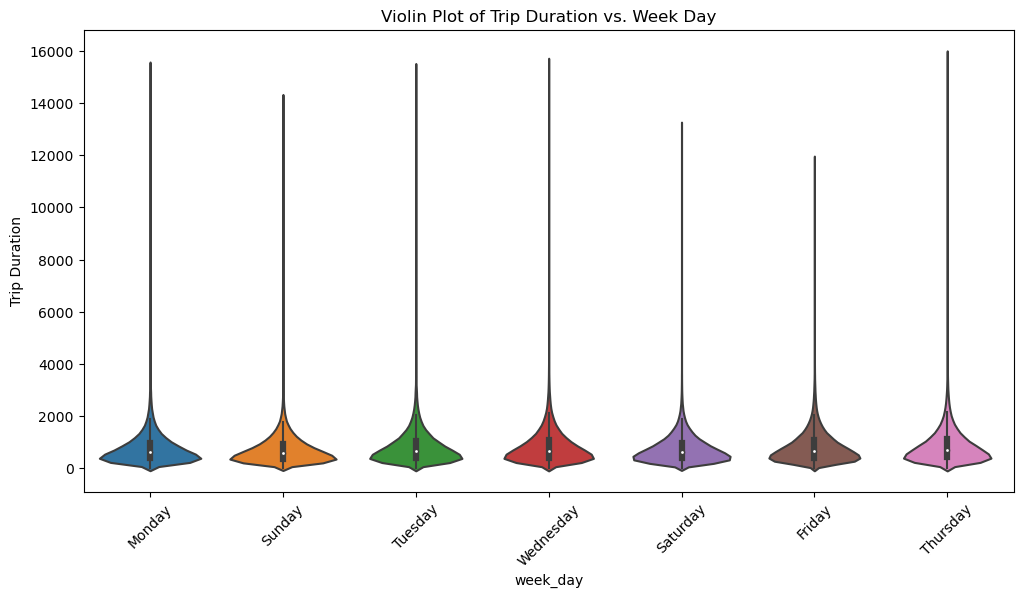

In [26]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='week_day', y='trip_duration', data=data)
plt.title('Violin Plot of Trip Duration vs. Week Day')
plt.xticks(rotation=45)
plt.ylabel('Trip Duration')
plt.show()


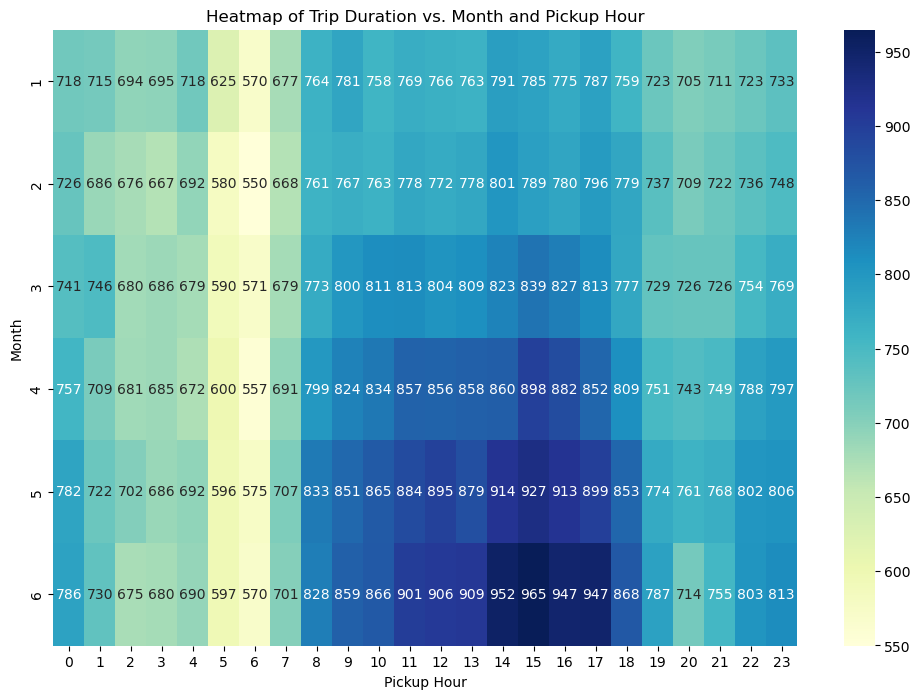

In [12]:
heatmap_data = data.pivot_table(values='trip_duration', index='month', columns='pickup_hour')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap of Trip Duration vs. Month and Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Month')
plt.show()

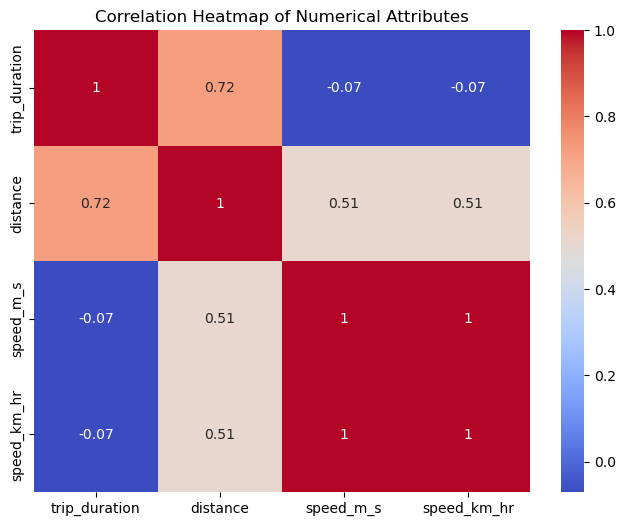

In [13]:
corr_matrix = data[['trip_duration', 'distance', 'speed_m_s', 'speed_km_hr']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Attributes')
plt.show()

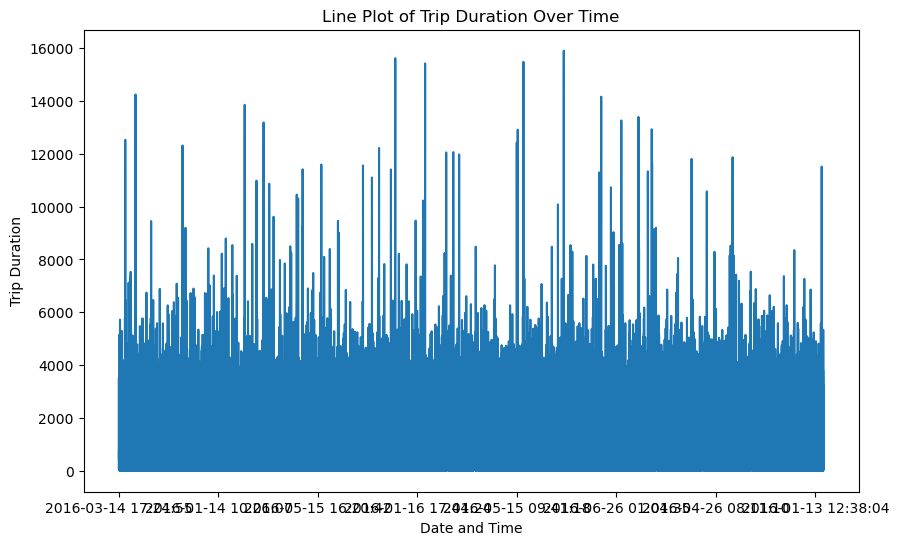

In [14]:
time_series_data = data.set_index('pickup_datetime')
plt.figure(figsize=(10, 6))
time_series_data['trip_duration'].plot()
plt.title('Line Plot of Trip Duration Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Trip Duration')
plt.show()

C:\Users\Ishita Agarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


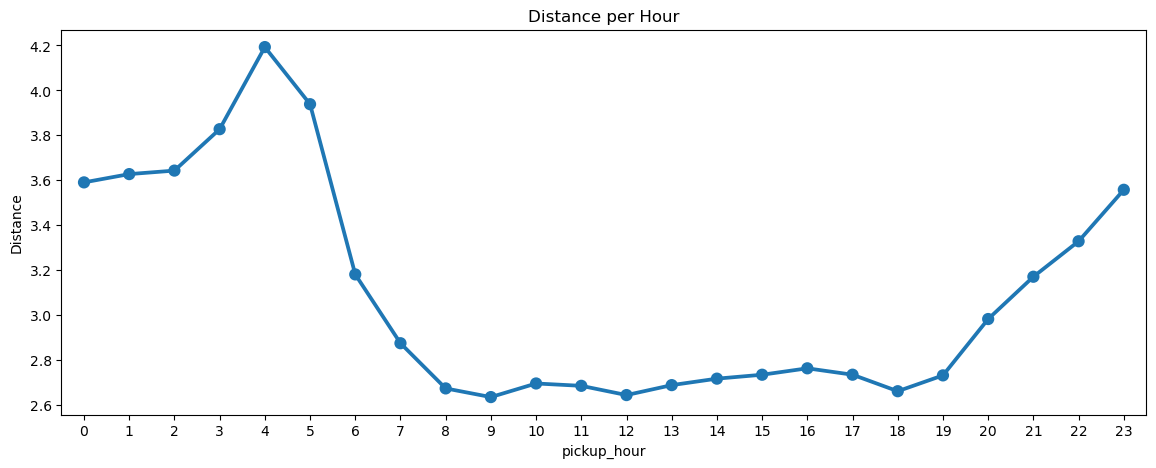

In [28]:
plt.figure(figsize = (14,5))
group5 = data.groupby('pickup_hour').distance.mean()
sns.pointplot(group5.index, group5.values)
plt.ylabel('Distance')
plt.title('Distance per Hour')
plt.show()

C:\Users\Ishita Agarwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


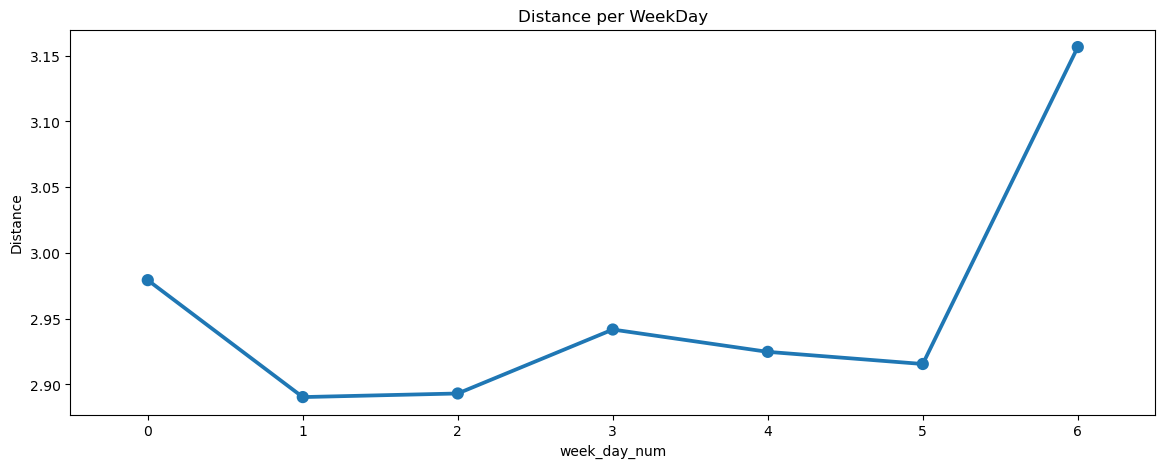

In [31]:
plt.figure(figsize = (14,5))
group6 = data.groupby('week_day_num').distance.mean()
sns.pointplot(group6.index, group6.values)
plt.ylabel('Distance')
plt.title('Distance per WeekDay')
plt.show()

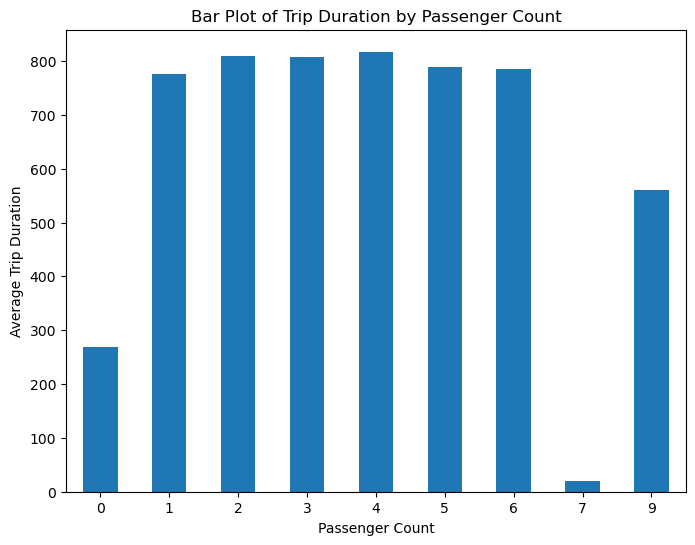

In [15]:
plt.figure(figsize=(8, 6))
data.groupby('passenger_count')['trip_duration'].mean().plot(kind='bar')
plt.title('Bar Plot of Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Trip Duration')
plt.xticks(rotation=0)
plt.show()

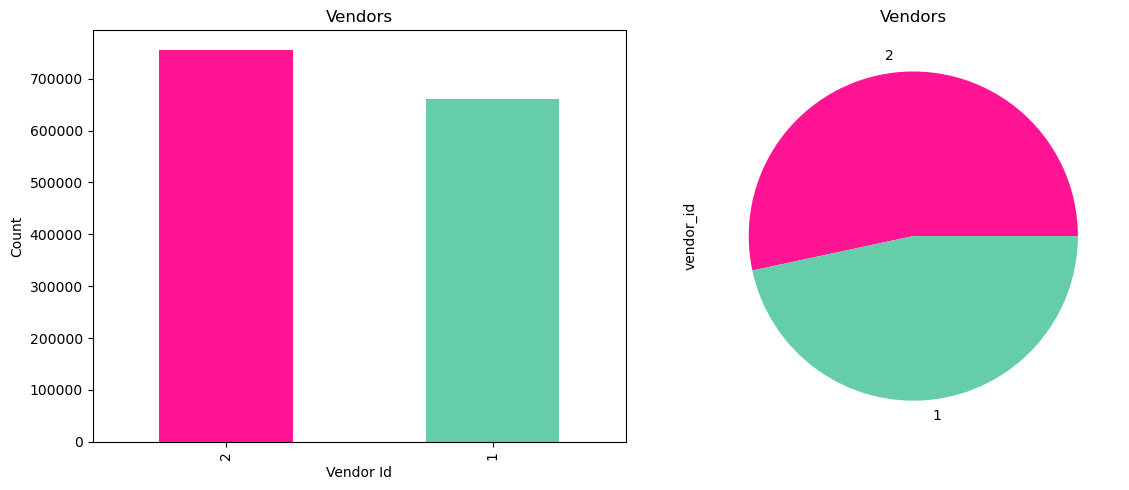

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = data['vendor_id'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0],color = ('deeppink', 'mediumaquamarine'))
data['vendor_id'].value_counts().plot(kind='pie',title="Vendors",ax=axes[1], colors = ['deeppink', 'mediumaquamarine'])
ax.set_ylabel("Count")
ax.set_xlabel("Vendor Id")
fig.tight_layout()

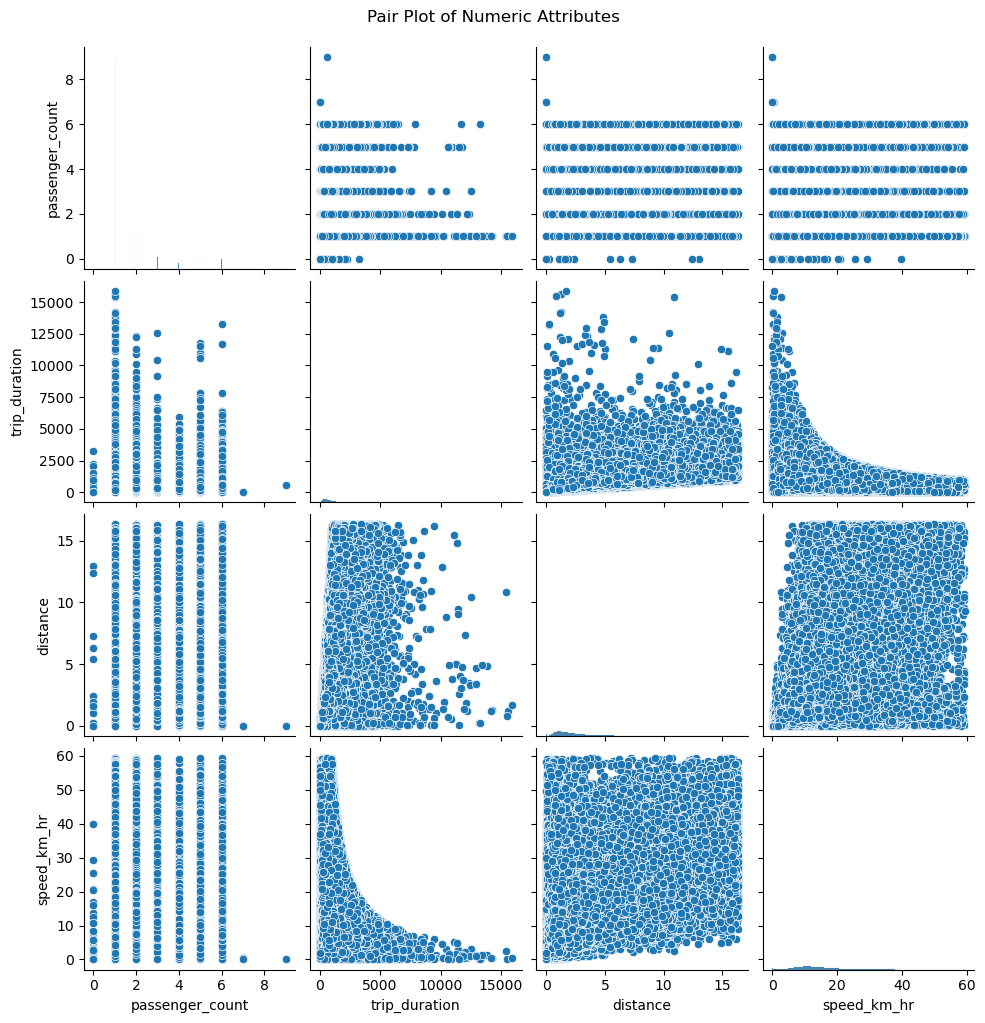

In [19]:
sns.pairplot(data[num_attributes])
plt.suptitle('Pair Plot of Numeric Attributes', y=1.02)
plt.show()

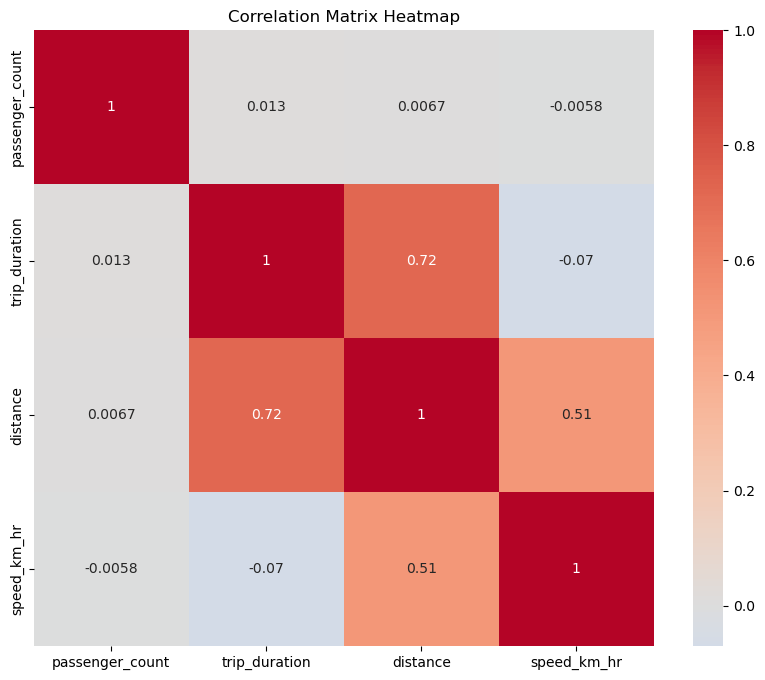

In [18]:
num_attributes = ['passenger_count', 'trip_duration', 'distance', 'speed_km_hr']
correlation_matrix = data[num_attributes].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

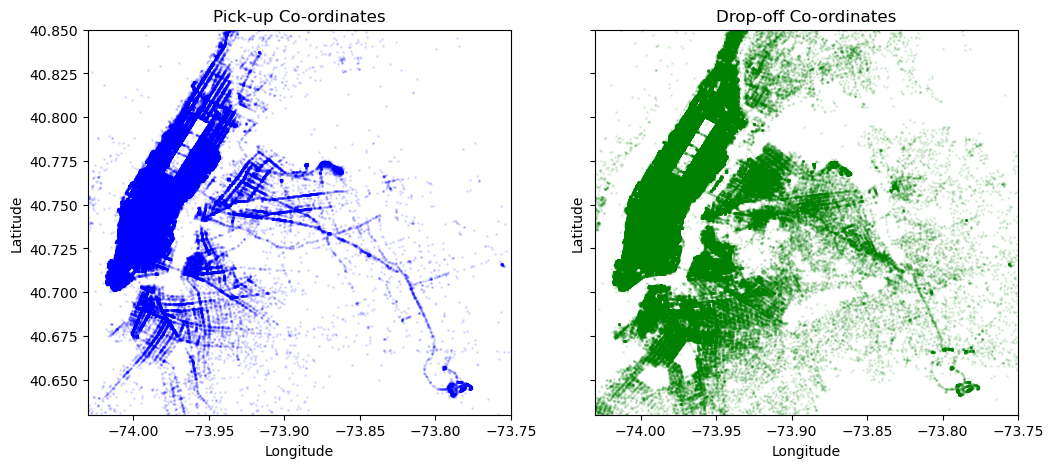

In [33]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize = (12,5))
ax[0].scatter(data['pickup_longitude'].values, data['pickup_latitude'].values,
color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(data['dropoff_longitude'].values, data['dropoff_latitude'].values,
color='green', s=1, label='train', alpha=0.1)
ax[1].set_title('Drop-off Co-ordinates')
ax[0].set_title('Pick-up Co-ordinates')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()